# Algorithme de recommandation

Dans ce code se trouve l'tape de preprocessing des données à utiliser pour la recommandation des établissements, puis l'algo de recommandation et ensuite une partie qui permet de tester la pertinence de l'algo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import seaborn as sns

## 1. Preprocessing des données


In [2]:
#lecture table
#base avec les variables concernant les établissements
variable = pd.read_csv('bdd_finale.csv', encoding="latin", dtype={"finessGeoDP":str})
variable.head()


,rs,dermopigmentation,DIEP,Gracillis/PAP/lambeau libre,grand dorsal,implant,lambeau pedicule/ TRAM,lipomodelage,plaque areolo mamelonnaire,volume,variation,sc_diversite,score_all_ajust,adresse,finessGeoDP,latitude,longitude,categ_pmsi
0,ÉTABLISSEMENT HOPALE CTRE CALOT/HELIO,0,0,0,0,0,0,1,0,6,-0.875000,1.000000,83.19,RUE DU DR CALOT,620000026,50.418622,1.566683,PSPH/EBNL
1,APHM HOPITAL LA CONCEPTION,0,1,1,1,1,0,1,1,339,1.266667,2.249163,NaN,147 BOULEVARD BAILLE,130783236,43.289475,5.396477,CHR/U
2,APHM HOPITAL LA TIMONE ENFANTS,0,0,1,0,1,0,1,0,30,3.285714,1.226158,60.10,264 RUE SAINT PIERRE,130804297,43.292175,5.402109,CHR/U
3,APHM HOPITAL NORD,0,1,0,1,1,1,1,1,23,-0.465116,3.412903,NaN,CHEMIN DES BOURRELY,130780521,43.380863,5.362830,CHR/U
4,APHM TIMONE ADULTES,0,0,1,0,0,0,1,0,37,0.947368,1.888276,NaN,264 RUE SAINT PIERRE,130783293,43.292175,5.402109,CHR/U


In [3]:
#distance entre les communes et les centres
distance=pd.read_csv('distance.csv', dtype={"finess_geo":str, "code_commune":str})
distance.head()


,finess_geo,latitude_finess,longitude_finess,distance,code_commune,latitude,longitude
0,010000024,46.2227,5.20859,2.472849,01053,46.2052,5.24602
1,010000024,46.2227,5.20859,2.472849,01344,46.2112,5.18463
2,010000032,45.7612,5.68497,71.034019,01053,46.2052,5.24602
3,010000032,45.7612,5.68497,71.034019,01344,46.2112,5.18463
4,010000065,45.9411,4.77195,57.479116,01053,46.2052,5.24602


In [4]:
distance.shape

(61332704, 7)

In [4]:
distance=distance[["finess_geo", "code_commune", "distance", "latitude_finess", "longitude_finess"]]


In [187]:
#on ne prend que les colbinaisons avec es établisseents faisant des reconstruction dans la base 
etablissement=variable['finessGeoDP'].tolist()

In [191]:
etablissement

['620000026',
 '130783236',
 '130804297',
 '130780521',
 '130783293',
 '920300191',
 '640018206',
 '840000467',
 '920300753',
 '920300183',
 '930300082',
 '920300712',
 '920300936',
 '160013207',
 '300002508',
 '210987731',
 '690000880',
 '600100168',
 '150780732',
 '290023431',
 '170780662',
 '780300406',
 '690000427',
 '910300144',
 '780300414',
 '920000650',
 '190000224',
 '670780113',
 '630000479',
 '450000062',
 '810000505',
 '300000023',
 '740781141',
 '740000237',
 '620000034',
 '620003202',
 '140024886',
 '890975527',
 '600000194',
 '650000417',
 '410000020',
 '620000653',
 '620000323',
 '110000023',
 '280504267',
 '360000137',
 '600113476',
 '910000306',
 '160000253',
 '840001861',
 '400000105',
 '2B0000012',
 '770000149',
 '680000700',
 '640000162',
 '330000605',
 '130002835',
 '790000087',
 '640000600',
 '240000489',
 '880000062',
 '420000010',
 '440000016',
 '170000103',
 '260000013',
 '780800256',
 '380000406',
 '910000298',
 '760000018',
 '760000182',
 '720000033',
 '1900

In [216]:
f=open('/Users/zoefontier/Desktop/01.Chirurgie reconstructive/01.data/etablissement.txt','w')
for ele in etablissement:
   f.write(ele+'\n')
f.close()

In [194]:
distance=distance.loc[distance['finess_geo'].isin(etablissement)]

In [195]:
distance.to_csv('distance2.csv')

In [186]:
print(distance.dtypes)
print(variable.dtypes)

finess_geo           object
code_commune         object
distance            float64
latitude_finess     float64
longitude_finess    float64
dtype: object
rs                              object
dermopigmentation                int64
DIEP                             int64
Gracillis/PAP/lambeau libre      int64
grand dorsal                     int64
implant                          int64
lambeau pedicule/ TRAM           int64
lipomodelage                     int64
plaque areolo mamelonnaire       int64
volume                           int64
variation                      float64
sc_diversite                   float64
score_all_ajust                float64
adresse                         object
finessGeoDP                     object
latitude                       float64
longitude                      float64
categ_pmsi                      object
techniques proposées            object
Honoraires                      object
volume_n                       float64
variation_n                

In [5]:
#table de transition code postal, code commune
code_postal=pd.read_csv('laposte_hexasmal.csv', encoding="latin", dtype={"finess_geo":str, "Code_commube_INSEE":str, "Code_postal":str}, sep=";", )

In [13]:
code_postal.head()

,Code_commune_INSEE,Nom_commune,Code_postal,Ligne_5,LibellÃ©_d_acheminement,coordonnees_gps
0,01004,AMBERIEU EN BUGEY,01500,NaN,AMBERIEU EN BUGEY,"45.9608475114,5.3729257777"
1,01008,AMBUTRIX,01500,NaN,AMBUTRIX,"45.9367134524,5.3328092349"
2,01015,ARBOYS EN BUGEY,01300,ST BOIS,ARBOYS EN BUGEY,"45.7237621545,5.65263086429"
3,01017,ARGIS,01230,NaN,ARGIS,"45.9337182132,5.48251100314"
4,01019,ARMIX,01510,NaN,ARMIX,"45.8541838459,5.58357838695"


### 1.1 Préparation des variables pour les établissements

#### Les techniques recommandées

In [6]:
# techniques proposées

def technique(df):
    
    df_ = df.copy()
    n = len(df)
    new_col = []
    for i in range(n):
        
        l=[]
        if df['DIEP'][i] == 1:
            l.append('DIEP')
        
        if df['Gracillis/PAP/lambeau libre'][i]==1:
            l.append('Technique du Gracilis/Pap')
        
        if df['grand dorsal'][i]==1:
            l.append('Grand Dorsal')
        
        if df['lipomodelage'][i]==1:
            l.append('Lipomodelage')
        
        if df['implant'][i]==1:
            l.append('Prothèse')
            
        if df['dermopigmentation'][i]==1:
            l.append('Tatouage de la plaque aréolo mamelonnaire')
        
        if df['plaque areolo mamelonnaire'][i]==1:
            l.append('Reconstruction de la plaque aréolomamelonnaire')
            
        new_col.append(l)
    
    df_['techniques proposées'] = new_col
    return df_
                
    


In [7]:
variable=technique(variable)

In [8]:
variable.head()

,rs,dermopigmentation,DIEP,Gracillis/PAP/lambeau libre,grand dorsal,implant,lambeau pedicule/ TRAM,lipomodelage,plaque areolo mamelonnaire,volume,variation,sc_diversite,score_all_ajust,adresse,finessGeoDP,latitude,longitude,categ_pmsi,techniques proposées
0,ÉTABLISSEMENT HOPALE CTRE CALOT/HELIO,0,0,0,0,0,0,1,0,6,-0.875000,1.000000,83.19,RUE DU DR CALOT,620000026,50.418622,1.566683,PSPH/EBNL,[Lipomodelage]
1,APHM HOPITAL LA CONCEPTION,0,1,1,1,1,0,1,1,339,1.266667,2.249163,NaN,147 BOULEVARD BAILLE,130783236,43.289475,5.396477,CHR/U,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal..."
2,APHM HOPITAL LA TIMONE ENFANTS,0,0,1,0,1,0,1,0,30,3.285714,1.226158,60.10,264 RUE SAINT PIERRE,130804297,43.292175,5.402109,CHR/U,"[Technique du Gracilis/Pap, Lipomodelage, Prot..."
3,APHM HOPITAL NORD,0,1,0,1,1,1,1,1,23,-0.465116,3.412903,NaN,CHEMIN DES BOURRELY,130780521,43.380863,5.362830,CHR/U,"[DIEP, Grand Dorsal, Lipomodelage, Prothèse, R..."
4,APHM TIMONE ADULTES,0,0,1,0,0,0,1,0,37,0.947368,1.888276,NaN,264 RUE SAINT PIERRE,130783293,43.292175,5.402109,CHR/U,"[Technique du Gracilis/Pap, Lipomodelage]"


#### Les honoraires

In [9]:
variable.loc[variable['categ_pmsi'] =="CLCC", 'Honoraires'] = "Pas de dépassement d'honoraires"
variable.loc[variable['categ_pmsi'] =="CHR/U", 'Honoraires'] = "Pas de dépassement d'honoraires"
variable.loc[variable['categ_pmsi'] =="CH", 'Honoraires'] = "Pas de dépassement d'honoraires"
variable.loc[variable['categ_pmsi'] =="Prive", 'Honoraires'] = "Possibles dépassements d'honoraires"
variable.loc[variable['categ_pmsi'] =="PSPH/EBNL", 'Honoraires'] = "Pas de dépassement d'honoraires"

variable.head()


,rs,dermopigmentation,DIEP,Gracillis/PAP/lambeau libre,grand dorsal,implant,lambeau pedicule/ TRAM,lipomodelage,plaque areolo mamelonnaire,volume,variation,sc_diversite,score_all_ajust,adresse,finessGeoDP,latitude,longitude,categ_pmsi,techniques proposées,Honoraires
0,ÉTABLISSEMENT HOPALE CTRE CALOT/HELIO,0,0,0,0,0,0,1,0,6,-0.875000,1.000000,83.19,RUE DU DR CALOT,620000026,50.418622,1.566683,PSPH/EBNL,[Lipomodelage],Pas de dépassement d'honoraires
1,APHM HOPITAL LA CONCEPTION,0,1,1,1,1,0,1,1,339,1.266667,2.249163,NaN,147 BOULEVARD BAILLE,130783236,43.289475,5.396477,CHR/U,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal...",Pas de dépassement d'honoraires
2,APHM HOPITAL LA TIMONE ENFANTS,0,0,1,0,1,0,1,0,30,3.285714,1.226158,60.10,264 RUE SAINT PIERRE,130804297,43.292175,5.402109,CHR/U,"[Technique du Gracilis/Pap, Lipomodelage, Prot...",Pas de dépassement d'honoraires
3,APHM HOPITAL NORD,0,1,0,1,1,1,1,1,23,-0.465116,3.412903,NaN,CHEMIN DES BOURRELY,130780521,43.380863,5.362830,CHR/U,"[DIEP, Grand Dorsal, Lipomodelage, Prothèse, R...",Pas de dépassement d'honoraires
4,APHM TIMONE ADULTES,0,0,1,0,0,0,1,0,37,0.947368,1.888276,NaN,264 RUE SAINT PIERRE,130783293,43.292175,5.402109,CHR/U,"[Technique du Gracilis/Pap, Lipomodelage]",Pas de dépassement d'honoraires


#### Normalisation des autres variables 

In [163]:
variable["volume_n"]= variable["volume"]
variable.loc[variable['volume_n'] > 250, 'volume_n'] = 250
variable.loc[variable['volume_n'] < 50, 'volume_n'] = 0

variable["volume_n"]=(variable["volume_n"]-variable["volume_n"].min())/(variable["volume_n"].max()-variable["volume_n"].min())
    
variable["variation_n"]=(variable["variation"]-variable["variation"].min())/(variable["variation"].max()-variable["variation"].min())
    
variable["sc_diversite_n"]=(variable["sc_diversite"]-variable["sc_diversite"].min())/(variable["sc_diversite"].max()-variable["sc_diversite"].min())
    
variable["score_all_ajust_n"]=(variable["score_all_ajust"]-variable["score_all_ajust"].min())/(variable["score_all_ajust"].max()-variable["sc_diversite"].min())
    


In [164]:
variable.head()

,rs,dermopigmentation,DIEP,Gracillis/PAP/lambeau libre,grand dorsal,implant,lambeau pedicule/ TRAM,lipomodelage,plaque areolo mamelonnaire,volume,...,finessGeoDP,latitude,longitude,categ_pmsi,techniques proposées,Honoraires,volume_n,variation_n,sc_diversite_n,score_all_ajust_n
0,ÉTABLISSEMENT HOPALE CTRE CALOT/HELIO,0,0,0,0,0,0,1,0,6,...,620000026,50.418622,1.566683,PSPH/EBNL,[Lipomodelage],Pas de dépassement d'honoraires,0.0,0.001511,0.000000,0.271009
1,APHM HOPITAL LA CONCEPTION,0,1,1,1,1,0,1,1,339,...,130783236,43.289475,5.396477,CHR/U,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal...",Pas de dépassement d'honoraires,1.0,0.048126,0.308544,NaN
2,APHM HOPITAL LA TIMONE ENFANTS,0,0,1,0,1,0,1,0,30,...,130804297,43.292175,5.402109,CHR/U,"[Technique du Gracilis/Pap, Lipomodelage, Prot...",Pas de dépassement d'honoraires,0.0,0.092071,0.055861,0.000000
3,APHM HOPITAL NORD,0,1,0,1,1,1,1,1,23,...,130780521,43.380863,5.362830,CHR/U,"[DIEP, Grand Dorsal, Lipomodelage, Prothèse, R...",Pas de dépassement d'honoraires,0.0,0.010433,0.595989,NaN
4,APHM TIMONE ADULTES,0,0,1,0,0,0,1,0,37,...,130783293,43.292175,5.402109,CHR/U,"[Technique du Gracilis/Pap, Lipomodelage]",Pas de dépassement d'honoraires,0.0,0.041176,0.219405,NaN


### 2. Algorithme de recommandations

In [196]:
def recommandation(code, commune, i):
    #recherche du bon code commune associé à la bonne ville (combinaison code postale x nom commune)
    commune=code_postal.loc[(code_postal["Code_postal"] == code)&(code_postal["Nom_commune"] == commune)] 
    code_commune=commune["Code_commune_INSEE"].values[0]
    print(code_commune)
    
    #chercher le code commune dans la base "distance"
    df_algo=distance.loc[distance["code_commune"]==code_commune]

    #merge avec les infos des établissements
    df_algo=pd.merge(df_algo, variable, left_on='finess_geo',right_on="finessGeoDP", how="inner")
   
    #normalisation de la distance
    df_algo["distance_n"]=1-(df_algo["distance"]-df_algo["distance"].min())/(df_algo["distance"].max()-df_algo["distance"].min())
    
    #score
    df_algo['score'] = df_algo.apply(lambda x:(3*x["volume_n"] + x["variation_n"]+4*x["sc_diversite_n"]+3*x["score_all_ajust_n"]+7*x["distance_n"])/18,axis=1)
    
    #df_algo['score'] = df_algo.apply(lambda x:(2*x["volume_n"] + x["variation_n"]+3*x["sc_diversite_n"]+2*x["score_all_ajust_n"]+5*x["distance_n"])/13,axis=1)
    
    #df_algo['score'] = df_algo.apply(lambda x:(2*x["volume_n"] + x["variation_n"]+3*x["sc_diversite_n"]+2*x["score_all_ajust_n"]+4*x["distance_n"])/12,axis=1)
    
    df_score=df_algo.sort_values(by='score', ascending=False)
    df_reco=df_score.head(i)
    #df_reco=df_score.loc[df_score["score"]>0.6]
    #df_reco=df_reco.sort_values(by='distance')
    
    df_reco=df_reco[["rs", "volume", "techniques proposées", "adresse", "categ_pmsi", "distance", "distance_n", "score","sc_diversite","score_all_ajust", "Honoraires"]]
    return df_reco



In [214]:
recommandation_Paris14=recommandation("60680","JONQUIERES", 10)

60326


In [215]:
recommandation_Paris14

,rs,volume,techniques proposées,adresse,categ_pmsi,distance,distance_n,score,sc_diversite,score_all_ajust,Honoraires
194,CLINIQUE HARTMANN,284,"[Technique du Gracilis/Pap, Grand Dorsal, Lipo...",26 BOULEVARD VICTOR HUGO,Prive,72.106742,0.841130,0.747730,5.048573,75.53,Possibles dépassements d'honoraires
211,INSTITUT GUSTAVE ROUSSY,1036,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal...",39 RUE CAMILLE DESMOULINS,CLCC,76.134549,0.830705,0.726151,4.594904,78.92,Pas de dépassement d'honoraires
162,CHU AMIENS SALOUËL,246,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal...",AVENUE RENÉ LAËNNEC,CHR/U,72.636441,0.839759,0.711588,4.514098,73.65,Pas de dépassement d'honoraires
111,CLCC INSTITUT CURIE,654,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal...",26 RUE D ULM,CLCC,71.708084,0.842162,0.663191,3.431831,77.39,Pas de dépassement d'honoraires
178,CLCC RENE HUGUENIN INSTITUT CURIE,600,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal...",35 RUE DAILLY,CLCC,80.038786,0.820600,0.651401,3.280182,79.97,Pas de dépassement d'honoraires
128,CHU PARIS OUEST SITE G POMPIDOU APHP,443,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal...",20 RUE LEBLANC,CHR/U,76.495114,0.829772,0.641244,3.222850,74.75,Pas de dépassement d'honoraires
58,CLCC OSCAR LAMBRET LILLE,445,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal...",3 FRÉDÉRIC COMBEMALE,CLCC,141.436216,0.661687,0.634940,3.886882,86.20,Pas de dépassement d'honoraires
99,GROUPEMENT HOSPITALIER PARIS SAINT-JOSEPH,187,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal...",185 RUE RAYMOND LOSSERAND,PSPH/EBNL,75.006772,0.833624,0.631011,3.635409,77.63,Pas de dépassement d'honoraires
114,FOND ST JEAN DE DIEU CLINIQUE OUDINOT,396,"[Grand Dorsal, Lipomodelage, Prothèse, Tatouag...",19 RUE OUDINOT,Prive,72.801917,0.839331,0.630943,2.686401,82.66,Possibles dépassements d'honoraires
109,HOPITAL TENON,315,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal...",4 RUE DE LA CHINE,CHR/U,66.428411,0.855827,0.612661,2.589987,72.18,Pas de dépassement d'honoraires


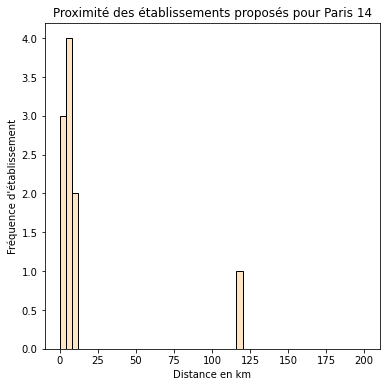

In [119]:
#distribution moyenne des scores et des variables


plt.figure(figsize=(6, 6))

plt.hist(recommandation_Paris14["distance"], range = (0, 200), bins = 50, color = 'bisque',
            edgecolor = 'black')
plt.xlabel('Distance en km')
plt.ylabel('Fréquence d\'établissement')
plt.title('Proximité des établissements proposés pour Paris 14')

plt.show()

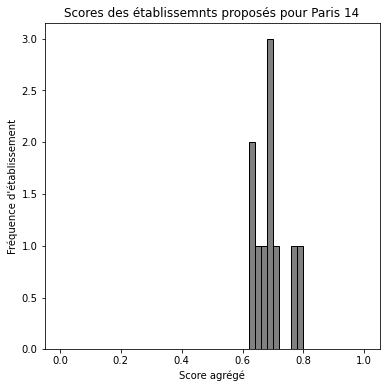

In [120]:
plt.figure(figsize=(6, 6))

plt.hist(recommandation_Paris14["score"], range = (0,1), bins = 50, color = 'grey',edgecolor = 'black')
plt.xlabel('Score agrégé')
plt.ylabel('Fréquence d\'établissement')
plt.title('Scores des établissemnts proposés pour Paris 14')

plt.show()

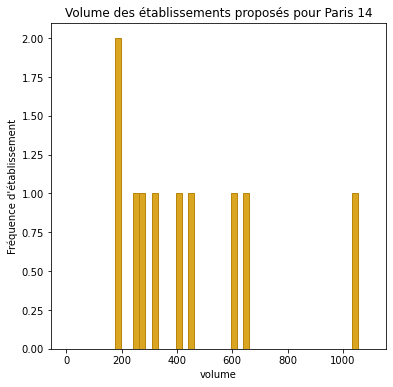

In [122]:
plt.figure(figsize=(6, 6))

plt.hist(recommandation_Paris14["volume"], range = (0, 1100), bins = 50, color = 'goldenrod',
            edgecolor = 'darkgoldenrod')
plt.xlabel('volume')
plt.ylabel('Fréquence d\'établissement')
plt.title('Volume des établissements proposés pour Paris 14')

plt.show()

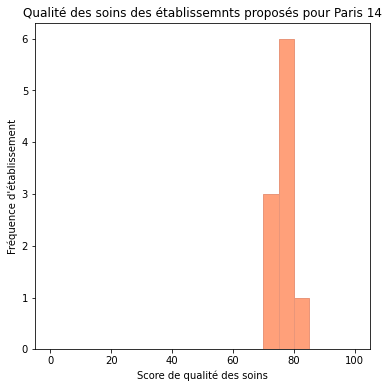

In [124]:
plt.figure(figsize=(6, 6))

plt.hist(recommandation_Paris14["score_all_ajust"], range = (0, 100), bins = 20, color = 'lightsalmon',
            edgecolor = 'darksalmon')
plt.xlabel('Score de qualité des soins')
plt.ylabel('Fréquence d\'établissement')
plt.title('Qualité des soins des établissemnts proposés pour Paris 14')

plt.show()

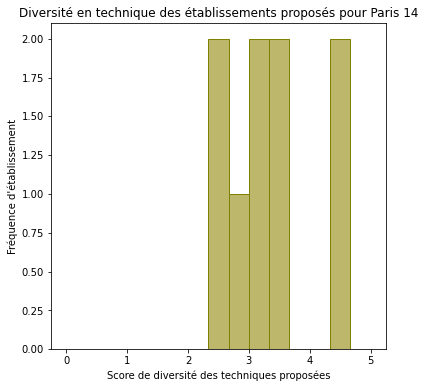

In [125]:
plt.figure(figsize=(6, 6))

plt.hist(recommandation_Paris14["sc_diversite"], range = (0, 5), bins = 15, color = 'darkkhaki',
            edgecolor = 'olive')
plt.xlabel('Score de diversité des techniques proposées')
plt.ylabel('Fréquence d\'établissement')
plt.title('Diversité en technique des établissements proposés pour Paris 14')

plt.show()

### 3. Test de l'algorithme

In [126]:
def plus_one(row):
    return row['row_num'] + 1

def mean_rank(data, h):
    classement_dict = {}
    score_dict={}
    distance_dict={}
    n=len(data)
    for i in range(n):
        classement=recommandation(data.iloc[i]["Code_postal"],data.iloc[i]["Nom_commune"],h)
        classement['row_num'] = np.arange(len(classement))
        classement['row_num']=classement.apply(plus_one, axis=1)
        nrow=len(classement)
        #print(nrow)
        for j in range(nrow):
            k=classement.iloc[j]["rs"]
            v=classement.iloc[j]["row_num"]
            d=classement.iloc[j]["distance"]
            s=classement.iloc[j]["score"]

            if k in classement_dict.keys():
                classement_dict[k].append(v)
                distance_dict[k].append(d)
                score_dict[k].append(s)
            else:
                classement_dict[k] = [v]
                distance_dict[k]= [d]
                score_dict[k]= [s]
    print(classement_dict)
    classement_moyen = {k: mean(v) for k, v in classement_dict.items()}
    distance_moyenne = {k: mean(v) for k, v in distance_dict.items()}
    score_moyen = {k: mean(v) for k, v in score_dict.items()}
    return(classement_moyen, distance_moyenne, score_moyen)




In [22]:
Paris=code_postal.loc[code_postal["Code_commune_INSEE"].str.startswith('75', na=False)]

In [145]:
mean_rank(Paris,10)

75106
75112
75113
75118
75102
75103
75108
75114
75116
75117
75119
75101
75105
75109
75110
75104
75107
75111
75115
75116
75120
{'CLINIQUE HARTMANN': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'INSTITUT GUSTAVE ROUSSY': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'CLCC INSTITUT CURIE': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], 'CLCC RENE HUGUENIN INSTITUT CURIE': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'CHU PARIS OUEST SITE G POMPIDOU APHP': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 'GROUPEMENT HOSPITALIER PARIS SAINT-JOSEPH': [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], 'FOND ST JEAN DE DIEU CLINIQUE OUDINOT': [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], 'CHU AMIENS SALOUËL': [8, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 9], 'HOPITAL TENON': [9, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 8], 'CHU HENRI MOND

({'CLINIQUE HARTMANN': 1,
  'INSTITUT GUSTAVE ROUSSY': 2,
  'CLCC INSTITUT CURIE': 3,
  'CLCC RENE HUGUENIN INSTITUT CURIE': 4,
  'CHU PARIS OUEST SITE G POMPIDOU APHP': 5,
  'GROUPEMENT HOSPITALIER PARIS SAINT-JOSEPH': 6,
  'FOND ST JEAN DE DIEU CLINIQUE OUDINOT': 7,
  'CHU AMIENS SALOUËL': 8,
  'HOPITAL TENON': 8,
  'CHU HENRI MONDOR SITE HENRI MONDOR APHP': 10},
 {'CLINIQUE HARTMANN': 7.888514085787181,
  'INSTITUT GUSTAVE ROUSSY': 8.345122445264705,
  'CLCC INSTITUT CURIE': 4.434180238263791,
  'CLCC RENE HUGUENIN INSTITUT CURIE': 13.743191328718018,
  'CHU PARIS OUEST SITE G POMPIDOU APHP': 8.040861836336148,
  'GROUPEMENT HOSPITALIER PARIS SAINT-JOSEPH': 6.015825361208777,
  'FOND ST JEAN DE DIEU CLINIQUE OUDINOT': 4.79580101782221,
  'CHU AMIENS SALOUËL': 113.1753055121485,
  'HOPITAL TENON': 7.204892031622758,
  'CHU HENRI MONDOR SITE HENRI MONDOR APHP': 14.193105198510176},
 {'CLINIQUE HARTMANN': 0.7924155182106629,
  'INSTITUT GUSTAVE ROUSSY': 0.7732959807601665,
  'CLCC INST

In [146]:
Indre=code_postal.loc[code_postal["Code_commune_INSEE"].str.startswith('36', na=False)]

In [147]:
mean_rank(Indre,10)

36001
36006
36010
36020
36022
36024
36028
36032
36035
36037
36044
36056
36059
36064
36065
36074
36080
36081
36092
36100
36105
36106
36109
36110
36111
36119
36120
36121
36123
36126
36127
36129
36157
36163
36165
36167
36192
36202
36203
36205
36207
36212
36214
36218
36221
36231
36235
36240
36243
36244
36247
36004
36005
36014
36023
36031
36033
36036
36041
36042
36070
36071
36079
36082
36084
36086
36090
36091
36107
36112
36117
36128
36131
36138
36147
36150
36152
36164
36168
36186
36188
36194
36209
36226
36229
36239
36242
36248
36012
36013
36015
36016
36017
36018
36019
36025
36043
36051
36052
36054
36055
36057
36061
36063
36073
36076
36093
36096
36099
36101
36103
36113
36115
36116
36124
36130
36144
36159
36161
36162
36169
36170
36171
36174
36175
36180
36181
36184
36187
36191
36195
36197
36199
36202
36211
36213
36215
36217
36222
36228
36230
36236
36237
36241
36244
36002
36007
36011
36021
36026
36029
36030
36040
36046
36047
36048
36053
36060
36070
36075
36077
36078
36085
36087
36098
36102
3610

({'CENTRE REGIONAL JEAN PERRIN': 3,
  'CLINIQUE HARTMANN': 2,
  'INSTITUT GUSTAVE ROUSSY': 3,
  'CHU LA MILETRIE': 3,
  'CRLCC': 4,
  'CHRU BRETONNEAU - TOURS': 6,
  'INSTITUT CLAUDIUS REGAUD': 8,
  'CLCC INSTITUT CURIE': 6,
  'CLCC RENE HUGUENIN INSTITUT CURIE': 7,
  'CHU PARIS OUEST SITE G POMPIDOU APHP': 8,
  'POLE SANTÉ LÉONARD DE VINCI': 7,
  "CLINIQUE DE L'ANJOU": 8,
  'CLINIQUE FIEF DE GRIMOIRE': 9,
  'CLINIQUE EMAILLEURS-COLOMBIER LIMOGES': 9,
  'ORELIANCE - LONGUES ALLEES': 8,
  'GROUPEMENT HOSPITALIER PARIS SAINT-JOSEPH': 9,
  'CHR ORLÉANS - HOPITAL DE LA SOURCE': 9,
  'FOND ST JEAN DE DIEU CLINIQUE OUDINOT': 10,
  'POLE SANTÉ REPUBLIQUE - CLERMONT': 7},
 {'CENTRE REGIONAL JEAN PERRIN': 201.1628821493696,
  'CLINIQUE HARTMANN': 248.47784748301459,
  'INSTITUT GUSTAVE ROUSSY': 241.36400779845818,
  'CHU LA MILETRIE': 132.29072054898649,
  'CRLCC': 252.7598823829006,
  'CHRU BRETONNEAU - TOURS': 125.60894845066159,
  'INSTITUT CLAUDIUS REGAUD': 332.4976289689848,
  'CLCC INSTIT

In [130]:
name={'CENTRE REGIONAL JEAN PERRIN',
  'CLINIQUE HARTMANN',
  'INSTITUT GUSTAVE ROUSSY',
  'CHU LA MILETRIE',
  'CHRU BRETONNEAU - TOURS',
  'CRLCC',
  'CLINIQUE EMAILLEURS-COLOMBIER LIMOGES',
  'ORELIANCE - LONGUES ALLEES',
  'POLE SANTÉ LÉONARD DE VINCI',
  'CHR ORLÉANS - HOPITAL DE LA SOURCE',
  'CLINIQUE FIEF DE GRIMOIRE',
  "CLINIQUE DE L'ANJOU",
  'CLCC RENE HUGUENIN INSTITUT CURIE',
  'CLCC INSTITUT CURIE',
  'GROUPEMENT HOSPITALIER PARIS SAINT-JOSEPH',
  'CH CHATEAUROUX',
  'CHU PARIS OUEST SITE G POMPIDOU APHP',
  'INSTITUT CLAUDIUS REGAUD',
  'CLINIQUE DES GRAINETIERES',
  'CHRU TROUSSEAU - CHAMBRAY',
  'POLE SANTÉ REPUBLIQUE - CLERMONT',
  'CH BLOIS SIMONE VEIL'}

In [131]:
recommandation=variable.loc[variable.apply(lambda x: x.rs in name, axis=1)]

In [48]:
recommandation.head()

,rs,dermopigmentation,DIEP,Gracillis/PAP/lambeau libre,grand dorsal,implant,lambeau pedicule/ TRAM,lipomodelage,plaque areolo mamelonnaire,volume,...,finessGeoDP,latitude,longitude,categ_pmsi,techniques proposées,Honoraires,volume_n,variation_n,sc_diversite_n,score_all_ajust_n
28,CENTRE REGIONAL JEAN PERRIN,1,1,1,1,1,0,1,1,375,...,630000479,45.757027,3.094437,CLCC,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal...",Pas de dépassement d'honoraires,1.000,0.047374,0.687450,0.257512
122,CHRU BRETONNEAU - TOURS,0,0,1,1,1,0,1,1,78,...,370000861,47.387190,0.669549,CHR/U,"[Technique du Gracilis/Pap, Grand Dorsal, Lipo...",Pas de dépassement d'honoraires,0.312,0.014959,0.617644,0.207746
131,CHU AMIENS SALOUËL,0,1,1,1,1,0,1,1,246,...,800006124,49.873500,2.254900,CHR/U,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal...",Pas de dépassement d'honoraires,0.984,0.029213,0.867984,0.159038
140,CHU LA MILETRIE,1,1,1,1,1,0,1,1,143,...,860000223,46.557749,0.387464,CHR/U,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal...",Pas de dépassement d'honoraires,0.572,0.032622,0.567007,0.177230
144,CHU PARIS OUEST SITE G POMPIDOU APHP,0,1,1,1,1,1,1,1,443,...,750803447,48.839348,2.275434,CHR/U,"[DIEP, Technique du Gracilis/Pap, Grand Dorsal...",Pas de dépassement d'honoraires,1.000,0.021965,0.549045,0.171948


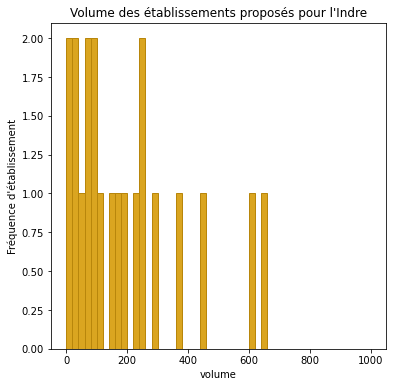

In [132]:
plt.figure(figsize=(6, 6))

plt.hist(recommandation["volume"], range = (0, 1000), bins = 50, color = 'goldenrod',
            edgecolor = 'darkgoldenrod')
plt.xlabel('volume')
plt.ylabel('Fréquence d\'établissement')
plt.title('Volume des établissements proposés pour l\'Indre')

plt.show()

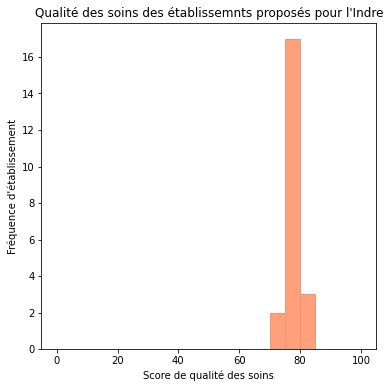

In [133]:
plt.figure(figsize=(6, 6))

plt.hist(recommandation["score_all_ajust"], range = (0, 100), bins = 20, color = 'lightsalmon',
            edgecolor = 'darksalmon')
plt.xlabel('Score de qualité des soins')
plt.ylabel('Fréquence d\'établissement')
plt.title('Qualité des soins des établissemnts proposés pour l\'Indre')

plt.show()

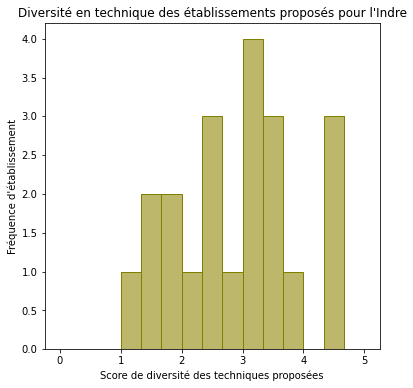

In [134]:
plt.figure(figsize=(6, 6))

plt.hist(recommandation["sc_diversite"], range = (0, 5), bins = 15, color = 'darkkhaki',
            edgecolor = 'olive')
plt.xlabel('Score de diversité des techniques proposées')
plt.ylabel('Fréquence d\'établissement')
plt.title('Diversité en technique des établissements proposés pour l\'Indre')

plt.show()

In [42]:
Bouche_Rhone=code_postal.loc[code_postal["Code_commune_INSEE"].str.startswith('13', na=False)]

In [148]:
mean_rank(Bouche_Rhone,10)

13004
13005
13007
13016
13022
13023
13025
13032
13033
13040
13040
13043
13056
13060
13062
13071
13076
13084
13085
13089
13092
13100
13107
13109
13114
13116
13117
13118
13203
13205
13211
13215
13001
13004
13004
13004
13004
13004
13006
13012
13017
13021
13026
13028
13029
13036
13041
13043
13045
13048
13050
13053
13056
13056
13057
13063
13069
13074
13081
13082
13086
13088
13096
13097
13101
13105
13119
13206
13208
13211
13213
13216
13001
13002
13003
13005
13008
13011
13015
13021
13027
13046
13047
13047
13056
13059
13061
13065
13068
13070
13071
13072
13075
13077
13079
13079
13080
13083
13087
13090
13106
13110
13204
13208
13209
13210
13213
13216
13001
13001
13002
13003
13009
13013
13016
13016
13031
13033
13038
13040
13041
13044
13051
13052
13053
13058
13066
13066
13071
13073
13078
13085
13088
13091
13093
13098
13102
13103
13112
13114
13115
13201
13202
13208
13209
13213
13213
13213
13213
13214
13001
13001
13004
13010
13013
13014
13016
13018
13019
13019
13020
13024
13026
13030
13034
13035
1303

({'INSTITUT DU CANCER DE MONTPELLIER': 3,
  'CLINIQUE CLEMENTVILLE': 5,
  'INSTITUT PAOLI - CALMETTES': 1,
  'CHU NIMES CAREMEAU': 5,
  'POLYCLINIQUE URBAIN V': 6,
  'CLINIQUE AXIUM': 3,
  'CLINIQUE KENNEDY': 7,
  'CLINIQUE BEAUREGARD': 4,
  'HOPITAL EUROPEEN DESBIEF AMBROISE PARE': 5,
  "CLINIQUE DE L'ETANG DE L'OLIVIER": 9,
  'CHITS CH SAINTE MUSSE': 5,
  'HOPITAL SAINT JOSEPH': 8,
  'CLINIQUE BOUCHARD': 9,
  "CHIC SITE D'AIX EN PROVENCE": 8,
  'HOPITAL NORD - CHU38': 9,
  "CH D'AVIGNON HENRI DUFFAUT": 9,
  'POLYCLINIQUE DU GRAND SUD': 10,
  'HOPITAL LAPEYRONIE CHU MONTPELLIER': 7,
  'HOPITAL ARNAUD DE VILLENEUVE CHU MPT': 8},
 {'INSTITUT DU CANCER DE MONTPELLIER': 159.70948747962186,
  'CLINIQUE CLEMENTVILLE': 158.08463082110887,
  'INSTITUT PAOLI - CALMETTES': 40.409144364332185,
  'CHU NIMES CAREMEAU': 80.89949332017702,
  'POLYCLINIQUE URBAIN V': 40.99701632568285,
  'CLINIQUE AXIUM': 35.844975099655045,
  'CLINIQUE KENNEDY': 51.902356127188035,
  'CLINIQUE BEAUREGARD': 37.010779

In [135]:
liste={'INSTITUT DU CANCER DE MONTPELLIER',
  'CLINIQUE CLEMENTVILLE',
  'CHU NIMES CAREMEAU',
  'INSTITUT PAOLI - CALMETTES',
  'POLYCLINIQUE URBAIN V',
  'CLINIQUE AXIUM',
  'CLINIQUE KENNEDY',
  "CLINIQUE DE L'ETANG DE L'OLIVIER",
  'HOPITAL EUROPEEN DESBIEF AMBROISE PARE',
  'CLINIQUE BEAUREGARD',
  'CHITS CH SAINTE MUSSE',
  'HOPITAL SAINT JOSEPH',
  "CHIC SITE D'AIX EN PROVENCE",
  'CLINIQUE BOUCHARD',
  'POLYCLINIQUE DU PARC RAMBOT',
  "CH D'AVIGNON HENRI DUFFAUT",
  'POLYCLINIQUE DU GRAND SUD',
  'CH LOUIS PASTEUR',
  'HOPITAL LAPEYRONIE CHU MONTPELLIER',
  'HOPITAL ARNAUD DE VILLENEUVE CHU MPT',
  'CLINIQUE SAINT JEAN'}

In [136]:
recommandation=variable.loc[variable.apply(lambda x: x.rs in name, axis=1)]

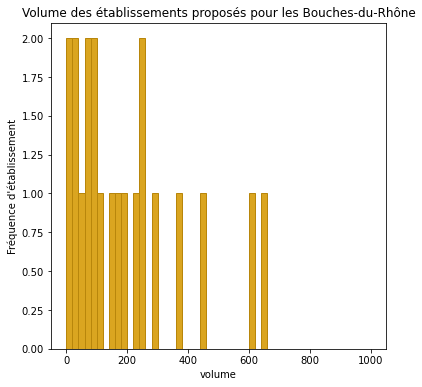

In [137]:
plt.figure(figsize=(6, 6))

plt.hist(recommandation["volume"], range = (0, 1000), bins = 50, color = 'goldenrod',
            edgecolor = 'darkgoldenrod')
plt.xlabel('volume')
plt.ylabel('Fréquence d\'établissement')
plt.title('Volume des établissements proposés pour les Bouches-du-Rhône')

plt.show()

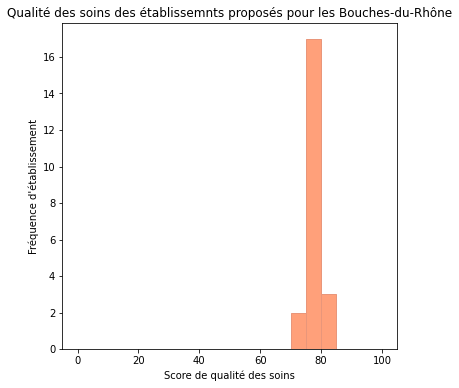

In [138]:
plt.figure(figsize=(6, 6))

plt.hist(recommandation["score_all_ajust"], range = (0, 100), bins = 20, color = 'lightsalmon',
            edgecolor = 'darksalmon')
plt.xlabel('Score de qualité des soins')
plt.ylabel('Fréquence d\'établissement')
plt.title('Qualité des soins des établissemnts proposés pour les Bouches-du-Rhône')

plt.show()

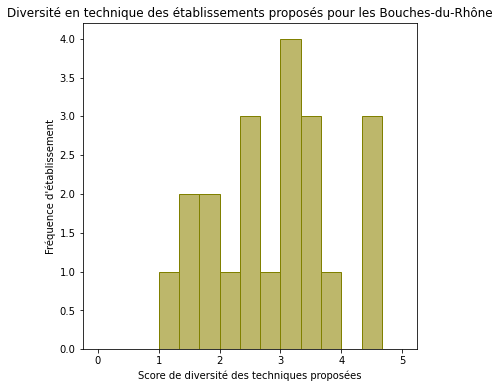

In [139]:
plt.figure(figsize=(6, 6))

plt.hist(recommandation["sc_diversite"], range = (0, 5), bins = 15, color = 'darkkhaki',
            edgecolor = 'olive')
plt.xlabel('Score de diversité des techniques proposées')
plt.ylabel('Fréquence d\'établissement')
plt.title('Diversité en technique des établissements proposés pour les Bouches-du-Rhône')

plt.show()

In [178]:
SSD=code_postal.loc[code_postal["Code_commune_INSEE"].str.startswith('93', na=False)]

,Code_commune_INSEE,Nom_commune,Code_postal,Ligne_5,LibellÃ©_d_acheminement,coordonnees_gps


In [150]:
mean_rank(SSD,10)

93008
93045
93059
93071
93079
93005
93010
93029
93046
93062
93063
93073
93077
93078
93013
93015
93047
93050
93055
93057
93074
93007
93014
93027
93032
93033
93053
93061
93066
93001
93006
93030
93031
93039
93048
93049
93051
93064
93066
93070
93072
{'CLINIQUE HARTMANN': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'INSTITUT GUSTAVE ROUSSY': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'CLCC INSTITUT CURIE': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], 'CLCC RENE HUGUENIN INSTITUT CURIE': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'CHU PARIS OUEST SITE G POMPIDOU APHP': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

({'CLINIQUE HARTMANN': 1,
  'INSTITUT GUSTAVE ROUSSY': 2,
  'CLCC INSTITUT CURIE': 3,
  'CLCC RENE HUGUENIN INSTITUT CURIE': 4,
  'CHU PARIS OUEST SITE G POMPIDOU APHP': 5,
  'GROUPEMENT HOSPITALIER PARIS SAINT-JOSEPH': 6,
  'FOND ST JEAN DE DIEU CLINIQUE OUDINOT': 7,
  'CHU AMIENS SALOUËL': 7,
  'HOPITAL TENON': 8,
  'CHU HENRI MONDOR SITE HENRI MONDOR APHP': 10},
 {'CLINIQUE HARTMANN': 20.858858670930246,
  'INSTITUT GUSTAVE ROUSSY': 19.60747624702677,
  'CLCC INSTITUT CURIE': 16.5161871294884,
  'CLCC RENE HUGUENIN INSTITUT CURIE': 28.481562944393858,
  'CHU PARIS OUEST SITE G POMPIDOU APHP': 22.90064548875729,
  'GROUPEMENT HOSPITALIER PARIS SAINT-JOSEPH': 20.07868847852786,
  'FOND ST JEAN DE DIEU CLINIQUE OUDINOT': 18.488168530426822,
  'CHU AMIENS SALOUËL': 109.74563085353314,
  'HOPITAL TENON': 11.36912058241448,
  'CHU HENRI MONDOR SITE HENRI MONDOR APHP': 14.90251908563125},
 {'CLINIQUE HARTMANN': 0.7811657736485156,
  'INSTITUT GUSTAVE ROUSSY': 0.7636876639983973,
  'CLCC IN